# Lab 1: Machine Learning and Data Acquisition

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\Users\olsso\anaconda3\envs\DT374B\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Acquire some data

Function for reading csv file:

In [145]:
def read_csv(filepath, cols, names):
    df = pd.read_csv(filepath, usecols=cols, names=names, header=None)
    df = df.drop([0], axis=0) # Remove first row (headers)
    df = df.astype('float64') # Cast data to floats
    
    return df

### Accelerometer

In [146]:
lay_acc_data = read_csv("data/training/lay_acc1.csv", [2,3,4], ['ax', 'ay', 'az'])
stand_acc_data = read_csv("data/training/stand_acc1.csv", [2,3,4], ['ax', 'ay', 'az'])

In [147]:
lay_acc_data

ax         ay        az
1     0.900300   9.901201 -0.349352
2     0.325424   9.990034 -0.416650
3     0.088235  10.121640 -0.397209
4     0.222233  10.088140 -0.486042
5     0.425922  10.124033 -0.354138
...        ...        ...       ...
1396 -0.462712   9.189935  0.915255
1397 -0.453141   9.335897  0.697508
1398 -0.453141   9.335897  0.697508
1399 -0.453141   9.335897  0.697508
1400 -0.453141   9.335897  0.697508

[1400 rows x 3 columns]

* Plot the accelerometer values using the the plot functions accessible for panda dataframes. Plot all accelerometer values, i.e. all samples for all components of the accelerometer vector.

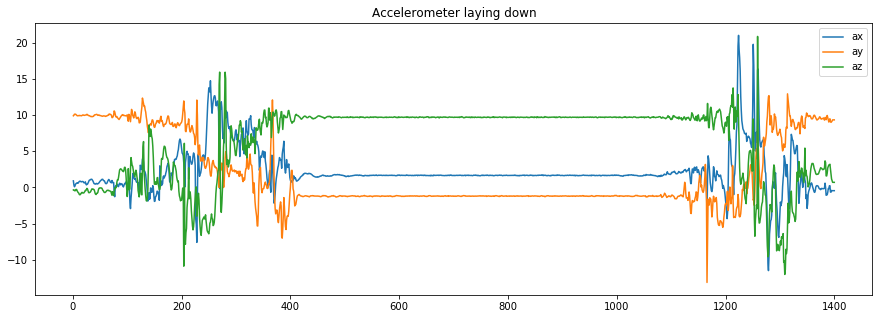

In [148]:
lay_acc_data.plot(kind = "line", title = "Accelerometer laying down", figsize=(15,5))
plt.show()

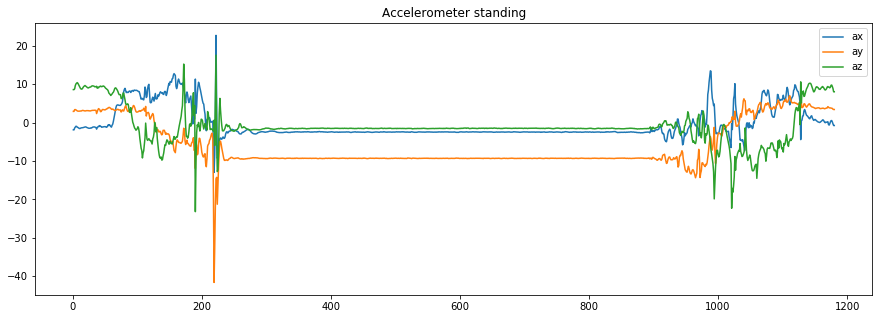

In [149]:
stand_acc_data.plot(kind = "line", title = "Accelerometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the accelerometer?<p>

    G-force. If the accelerometer is reasonably leveled one axis should show about &pm;1g and the other two axes around 0g.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the accelerometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 10. The unit is not shown in the app. The csv-file reveals the unit being milliseconds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [30]:
1 / (10 * 10**-3)

100.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 100 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Even though the phone (and hence the accelerometer) is still, the output from the three axes is different in the two plots. The reason is that the phone is positioned differently in regards to earths gravitation laying down compared to standing. Therefore, earth's gravity pulls different axes.

### Magnetometer

In [150]:
lay_mag_data = read_csv("data/training/lay_mag1.csv", [2,3,4], ['mx', 'my', 'mz'])
stand_mag_data = read_csv("data/training/stand_mag1.csv", [2,3,4], ['mx', 'my', 'mz'])

In [151]:
lay_mag_data

mx         my         mz
1    -32.718750 -48.562504 -29.043750
2    -30.018751 -46.968750 -28.200000
3    -30.975000 -48.750004 -27.468752
4    -32.512500 -47.456253 -26.325000
5    -31.968752 -45.900000 -27.525002
...         ...        ...        ...
1410 -30.150002 -18.600000 -43.443752
1411 -30.150002 -18.600000 -43.443752
1412 -30.150002 -18.600000 -43.443752
1413 -30.150002 -18.600000 -43.443752
1414 -30.150002 -18.600000 -43.443752

[1414 rows x 3 columns]

* Plot the magnetometer values using the the plot functions accessible for panda dataframes. Plot all magnetometer values, i.e. all samples for all components of the magnetometer vector.

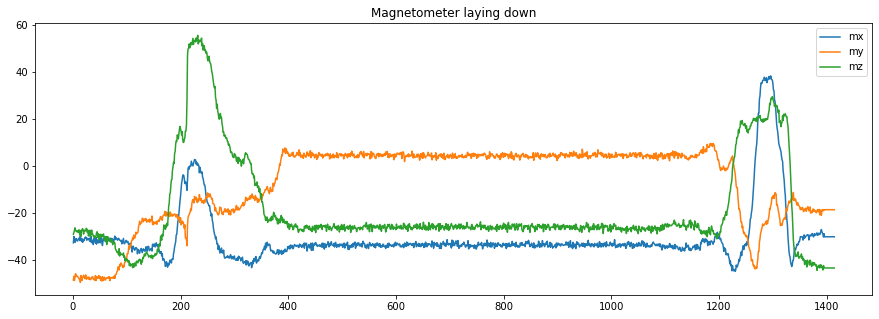

In [152]:
lay_mag_data.plot(kind = "line", title = "Magnetometer laying down", figsize=(15,5))
plt.show()

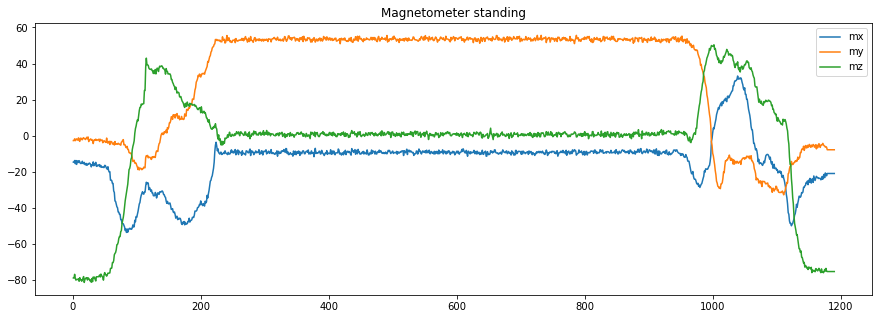

In [153]:
stand_mag_data.plot(kind = "line", title = "Magnetometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the magnetometer?<p>
    
    The force of the magnetic field around the phone.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the magnetometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 10. The unit is not shown in the app. The csv-file reveals the unit being milliseconds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [35]:
1 / (10 * 10**-3)

100.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 10 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Assuming earth's magnetic field has the largest contribution to the magnetic field around the phone and all other magnetic field components are negligible, the same reasoning should hold true for the magnetometer as for the accelerometer - the phone is positioned differently in space, thus giving different output in the three axes.

## Vector algebra

### Formulas

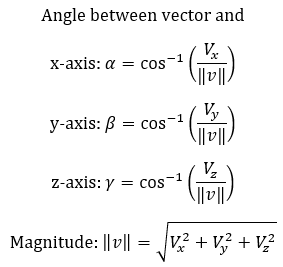

### Calculation functions

In [36]:
def calc_magnitude(df, i):
    return np.sqrt(df[df.columns[0]].iloc[i]**2 + df[df.columns[1]].iloc[i]**2 + df[df.columns[2]].iloc[i]**2)

In [37]:
def calc_angle(df, axis, i):
    return np.rad2deg(np.arccos(df[axis].iloc[i] / calc_magnitude(df, i)))

In [38]:
def calc_magnitudes(df):
    l = []
    
    for i in range(len(df)):
        l.append(calc_magnitude(df, i))
        
    return pd.DataFrame({'Magnitude': l})

In [39]:
def calc_angles(df, axis):
    l = []
    
    for i in range(len(df)):
        l.append(calc_angle(df, axis, i))
        
    return pd.DataFrame({'Angle in degrees': l})

### Calculations and plots

* Calculate the angle between the acceleration values and the z-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

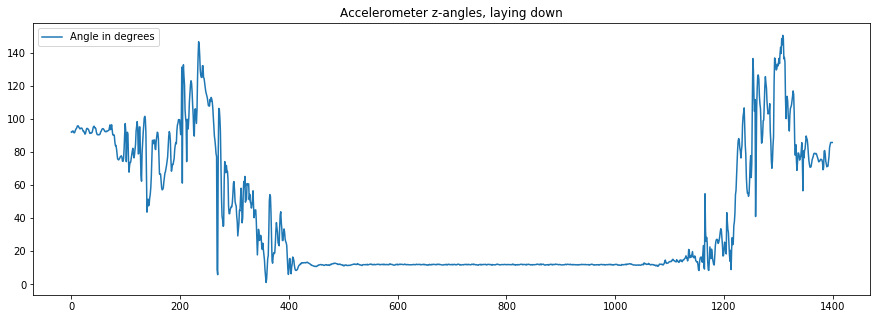

In [40]:
lay_acc_z_angles = calc_angles(lay_acc_data, lay_acc_data.columns[2])
lay_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, laying down", figsize=(15,5))
plt.show()

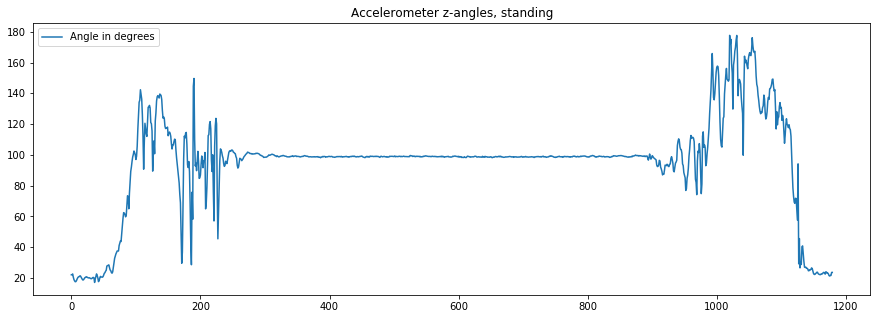

In [41]:
stand_acc_z_angles = calc_angles(stand_acc_data, stand_acc_data.columns[2])
stand_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, standing", figsize=(15,5))
plt.show()

* Calculate the angle between the magnetometer values and the y-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

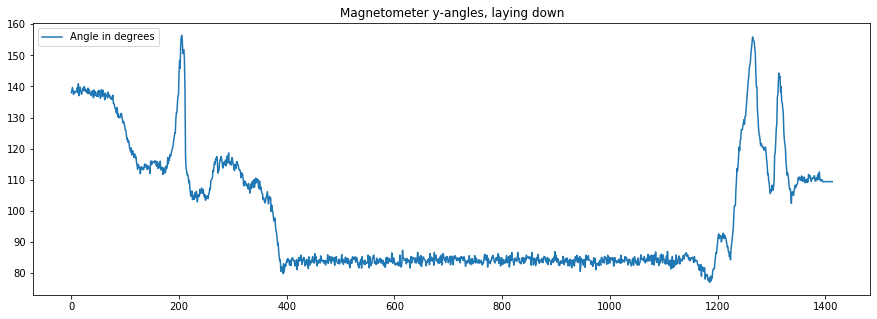

In [42]:
lay_mag_y_angles = calc_angles(lay_mag_data, lay_mag_data.columns[1])
lay_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, laying down", figsize=(15,5))
plt.show()

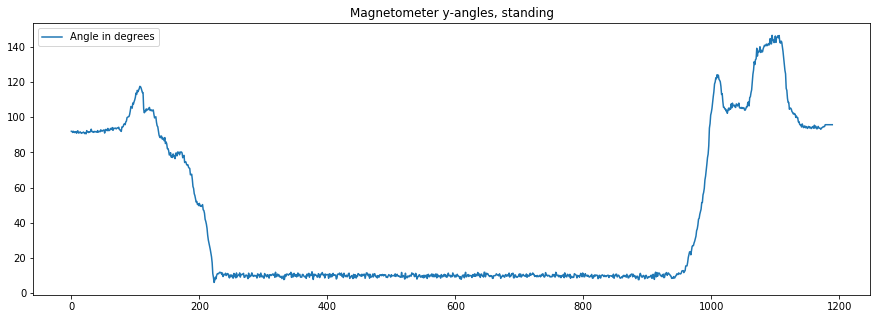

In [43]:
stand_mag_y_angles = calc_angles(stand_mag_data, stand_mag_data.columns[1])
stand_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the accelerometer data for all samples, store and plot.

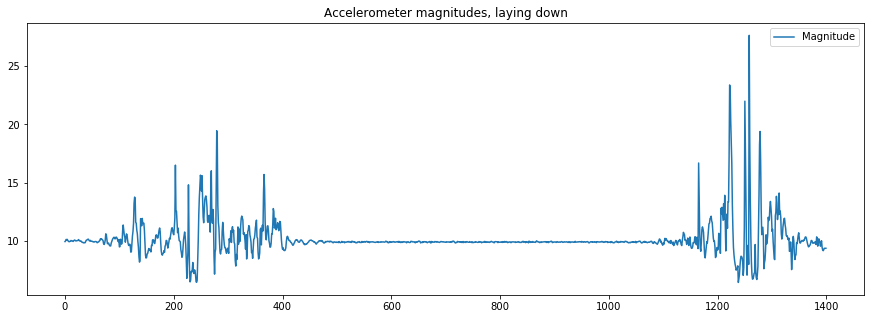

In [44]:
lay_acc_magnitudes = calc_magnitudes(lay_acc_data)
lay_acc_magnitudes.plot(kind = "line", title = "Accelerometer magnitudes, laying down", figsize=(15,5))
plt.show()

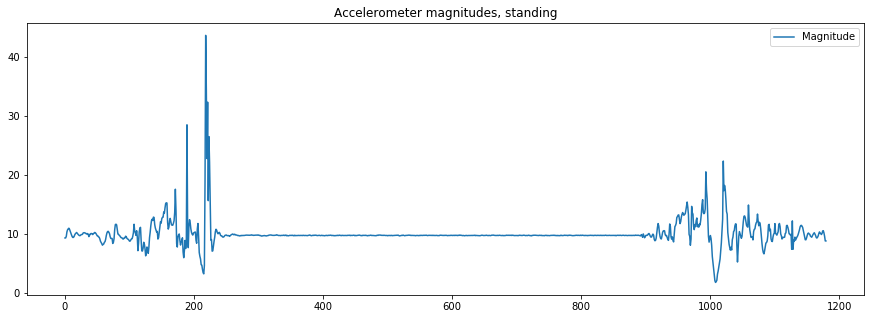

In [45]:
stand_acc_magnitudes = calc_magnitudes(stand_acc_data)
stand_acc_magnitudes.plot(kind = "line", title = "Accelerometer magnitudes, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the magnetometer data for all samples, store and plot.

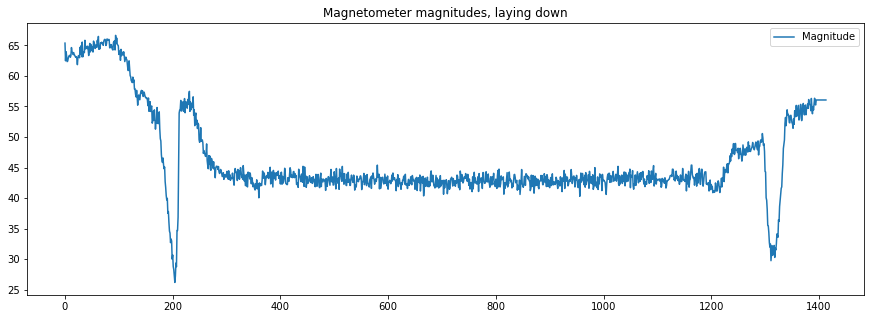

In [46]:
lay_mag_magnitudes = calc_magnitudes(lay_mag_data)
lay_mag_magnitudes.plot(kind = "line", title = "Magnetometer magnitudes, laying down", figsize=(15,5))
plt.show()

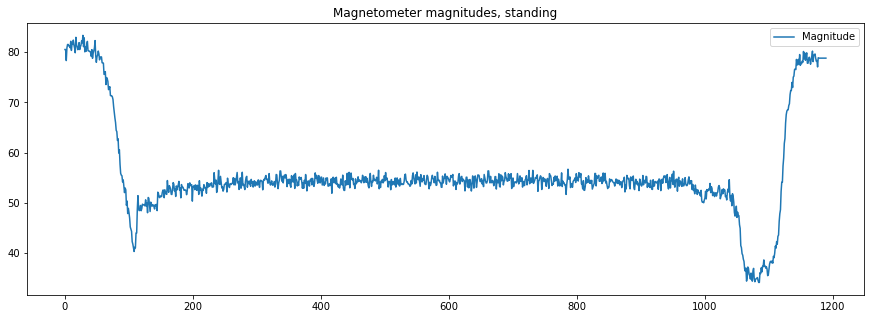

In [47]:
stand_mag_magnitudes = calc_magnitudes(stand_mag_data)
stand_mag_magnitudes.plot(kind = "line", title = "Magnetometer magnitudes, standing", figsize=(15,5))
plt.show()

## Python

* Create a python function that can read all files from a class for both sensors. The function should return a dataframe x with all the data and another dataframe y with information of which class the data belongs to.

In [155]:
class_name = 'sit'
names = ['ax', 'ay', 'az', 'mx', 'my', 'mz']

for file in glob.glob('data/*/' + class_name + '*.csv'):
    print(file.replace('\\', '/'))

data/test/sit_acc3.csv
data/test/sit_mag3.csv
data/training/sit_acc1.csv
data/training/sit_acc2.csv
data/training/sit_mag1.csv
data/training/sit_mag2.csv


In [178]:
df = read_csv('data/test/sit_acc3.csv', [2,3,4], names[:3])
print(df)
print(len(df))
print(df.drop([1175], axis=0))

            ax        ay        az
1    -2.005485  4.425226  7.581958
2    -1.962414  4.710271  7.505387
3    -1.857130  4.844569  7.948658
4    -1.708475  4.664808  8.274381
5    -1.651048  4.489832  8.638389
...        ...       ...       ...
1174 -0.101097  2.903989  9.754641
1175 -0.498604  3.153142  8.674281
1176 -0.987338  3.555734  7.646863
1177 -1.164707  3.747160  7.395318
1178 -1.164707  3.747160  7.395318

[1178 rows x 3 columns]
1178
            ax        ay         az
1    -2.005485  4.425226   7.581958
2    -1.962414  4.710271   7.505387
3    -1.857130  4.844569   7.948658
4    -1.708475  4.664808   8.274381
5    -1.651048  4.489832   8.638389
...        ...       ...        ...
1173  0.238983  2.801098  10.689038
1174 -0.101097  2.903989   9.754641
1176 -0.987338  3.555734   7.646863
1177 -1.164707  3.747160   7.395318
1178 -1.164707  3.747160   7.395318

[1177 rows x 3 columns]


In [249]:
import glob

def read_csvs(class_name):
    names = ['ax', 'ay', 'az', 'mx', 'my', 'mz']
    X = pd.DataFrame()
    y = pd.DataFrame(columns=['target'])
    
    for file in glob.glob('data/*/' + class_name + '*.csv'):
        if 'acc' in file:
            mag_file = file.replace('acc', 'mag')
            
            df_acc = read_csv(file.replace('\\', '/'), [2,3,4], names[:3])
            df_mag = read_csv(mag_file.replace('\\', '/'), [2,3,4], names[3:])
            
            df = pd.concat([df_acc, df_mag], axis=1, join='inner')
            X = X.append(df, ignore_index=True)
            
            print(file + '\tRows: ', end='')
            print(len(df_acc))
            print(mag_file + '\tRows: ', end='')
            print(len(df_mag))
            print()
            print(X)
            print()
            print()
            
        
        #y

In [250]:
read_csvs('sit')

data\test\sit_acc3.csv	Rows: 1178
data\test\sit_mag3.csv	Rows: 1188

            ax        ay        az         mx        my         mz
0    -2.005485  4.425226  7.581958 -20.081251 -8.737500 -77.737500
1    -1.962414  4.710271  7.505387 -20.756250 -8.925000 -77.381256
2    -1.857130  4.844569  7.948658 -20.306252 -7.762500 -77.925000
3    -1.708475  4.664808  8.274381 -20.306252 -7.743750 -77.118750
4    -1.651048  4.489832  8.638389 -20.343750 -8.700001 -76.106255
...        ...       ...       ...        ...       ...        ...
1173 -0.101097  2.903989  9.754641 -23.193750 -2.587500 -78.693756
1174 -0.498604  3.153142  8.674281 -23.193750 -2.587500 -78.693756
1175 -0.987338  3.555734  7.646863 -22.556252 -2.006250 -79.875000
1176 -1.164707  3.747160  7.395318 -22.556252 -2.006250 -79.875000
1177 -1.164707  3.747160  7.395318 -22.556252 -2.006250 -79.875000

[1178 rows x 6 columns]


data\training\sit_acc1.csv	Rows: 1215
data\training\sit_mag1.csv	Rows: 1223

            ax        a